# Applied Data Science IBM Capstone "SpaceX Falcon9"

## Data Collection

### Import Libraries
* Requests allows us to make HTTP requests which we will use to get data from an API
* Pandas is a software library written for the Python programming language for data manipulation and analysis.
* NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
* Datetime is a library that allows us to represent dates


In [56]:
import requests
import pandas as pd 
import numpy as np
import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

### Series of helper functions that will help us use the API to extract information using identification numbers in the launch data.

From the <code>rocket</code> column we would like to learn the booster name.


In [3]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

From the <code>launchpad</code> we would like to know the name of the launch site being used, the logitude, and the latitude.

In [4]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])

From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to.

In [5]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

In [6]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

Now let's start requesting rocket launch data from SpaceX API with the following URL:

In [7]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [8]:
response = requests.get(spacex_url)

In [9]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

### Task 1: Request and parse the SpaceX launch data using the GET request

In [10]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [11]:
response.status_code

200

In [12]:
res = response.json()

In [17]:
# Use json_normalize method to convert the json result into a dataframe
data = pd.json_normalize(res)

In [18]:
data.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

You will notice that a lot of the data are IDs. For example the rocket column has no information about the rocket just an identification number.

We will now use the API again to get information about the launches using the IDs given for each launch. Specifically we will be using columns <code>rocket</code>, <code>payloads</code>, <code>launchpad</code>, and <code>cores</code>.

In [19]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

*   From the <code>rocket</code> we would like to learn the booster name

*   From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to

*   From the <code>launchpad</code> we would like to know the name of the launch site being used, the longitude, and the latitude.

*   From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

The data from these requests will be stored in lists and will be used to create a new dataframe.

In [20]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

These functions will apply the outputs globally to the above variables. Let's take a looks at <code>BoosterVersion</code> variable. Before we apply  <code>getBoosterVersion</code> the list is empty:

In [21]:
BoosterVersion

[]

Now, let's apply <code> getBoosterVersion</code> function method to get the booster version

In [22]:
# Call getBoosterVersion
getBoosterVersion(data)

In [23]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [24]:
# Call getLaunchSite
getLaunchSite(data)

# Call getPayloadData
getPayloadData(data)

# Call getCoreData
getCoreData(data)

Finally lets construct our dataset using the data we have obtained. We we combine the columns into a dictionary.

In [25]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


Then, we need to create a Pandas data frame from the dictionary launch_dict.

In [26]:
df = pd.DataFrame([launch_dict])

In [27]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,"[1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106]","[2006-03-24, 2007-03-21, 2008-09-28, 2009-07-13, 2010-06-04, 2012-05-22, 2013-03-01, 2013-09-29, 2013-12-03, 2014-01-06, 2014-04-18, 2014-07-14, 2014-08-05, 2014-09-07, 2014-09-21, 2015-01-10, 2015-02-11, 2015-04-14, 2015-04-27, 2015-06-28, 2015-12-22, 2016-01-17, 2016-03-04, 2016-04-08, 2016-05-06, 2016-05-27, 2016-07-18, 2016-08-14, 2016-09-01, 2017-01-14, 2017-02-19, 2017-03-16, 2017-03-30, 2017-05-01, 2017-05-15, 2017-06-03, 2017-06-23, 2017-06-25, 2017-07-05, 2017-08-14, 2017-08-24, 2017-09-07, 2017-10-09, 2017-10-11, 2017-10-30, 2017-12-15, 2017-12-23, 2018-01-08, 2018-01-31, 2018-03-06, 2018-03-30, 2018-04-02, 2018-04-18, 2018-05-11, 2018-06-04, 2018-06-29, 2018-07-22, 2018-07-25, 2018-08-07, 2018-09-10, 2018-10-08, 2018-11-15, 2018-12-03, 2018-12-05, 2018-12-23, 2019-01-11, 2019-03-02, 2019-05-04, 2019-05-24, 2019-06-12, 2019-07-25, 2019-08-06, 2019-11-11, 2019-12-05, 2019-12-17, 2020-01-07, 2020-01-19, 2020-01-29, 2020-02-17, 2020-03-07, 2020-03-18, 2020-04-22, 2020-05-30, 2020-06-04, 2020-06-13, 2020-06-30, 2020-07-20, 2020-08-18, 2020-08-30, 2020-09-03, 2020-10-06, 2020-10-18, 2020-10-24, 2020-11-05]","[Falcon 1, Falcon 1, Falcon 1, Falcon 1, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9]","[20, None, 165, 200, None, 525, 677, 500, 3170, 3325, 2296, 1316, 4535, 4428, 2216, 2395, 570, 1898, 4707, 2477, 2034, 553, 5271, 3136, 4696, 3100, 2257, 4600, 5500, 9600, 2490, 5600, 5300, None, 6070, 2708, 3669, 9600, 6761, 2910, 475, 4990, 9600, 5200, 3700, 2205, 9600, None, 4230, 6092, 9600, 2760, 350, 3750, 5383.85, 2410, 7076, 9600, 5800, 7060, 2800, 3000, 4000, 2573, 4400, 9600, 12259, 2482, 13200, 1425, 2227.7, 6500, 15600, 5000, 6800, 15600, None, 15600, 15600, 1977, 15600, 15600, 9525, 15600, 15600, 3880, None, 15600, 1600, 15600, 15600, 15600, 15600, 3681]","[LEO, LEO, LEO, LEO, LEO, LEO, ISS, PO, GTO, GTO, ISS, LEO, GTO, GTO, ISS, ISS, ES-L1, ISS, GTO, ISS, LEO, PO, GTO, ISS, GTO, GTO, ISS, GTO, GTO, PO, ISS, GTO, GTO, LEO, GTO, ISS, GTO, PO, GTO, ISS, SSO, LEO, PO, GTO, GTO, ISS, PO, LEO, GTO, GTO, PO, ISS, HEO, GTO, GTO, ISS, GTO, PO, GTO, GTO, SSO, GTO, SSO, ISS, MEO, PO, ISS, ISS, VLEO, SSO, ISS, GTO, VLEO, ISS, GTO, VLEO, SO, VLEO, VLEO, ISS, VLEO, VLEO, ISS, VLEO, VLEO, MEO, GEO, VLEO, SSO, VLEO, VLEO, VLEO, VLEO, MEO]","[Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, 

### Task 2: Filter the dataframe to only include `Falcon 9` launches

In [30]:
data_falcon9 = df[df['BoosterVersion']!='Falcon 1']

In [31]:
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,"[1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106]","[2006-03-24, 2007-03-21, 2008-09-28, 2009-07-13, 2010-06-04, 2012-05-22, 2013-03-01, 2013-09-29, 2013-12-03, 2014-01-06, 2014-04-18, 2014-07-14, 2014-08-05, 2014-09-07, 2014-09-21, 2015-01-10, 2015-02-11, 2015-04-14, 2015-04-27, 2015-06-28, 2015-12-22, 2016-01-17, 2016-03-04, 2016-04-08, 2016-05-06, 2016-05-27, 2016-07-18, 2016-08-14, 2016-09-01, 2017-01-14, 2017-02-19, 2017-03-16, 2017-03-30, 2017-05-01, 2017-05-15, 2017-06-03, 2017-06-23, 2017-06-25, 2017-07-05, 2017-08-14, 2017-08-24, 2017-09-07, 2017-10-09, 2017-10-11, 2017-10-30, 2017-12-15, 2017-12-23, 2018-01-08, 2018-01-31, 2018-03-06, 2018-03-30, 2018-04-02, 2018-04-18, 2018-05-11, 2018-06-04, 2018-06-29, 2018-07-22, 2018-07-25, 2018-08-07, 2018-09-10, 2018-10-08, 2018-11-15, 2018-12-03, 2018-12-05, 2018-12-23, 2019-01-11, 2019-03-02, 2019-05-04, 2019-05-24, 2019-06-12, 2019-07-25, 2019-08-06, 2019-11-11, 2019-12-05, 2019-12-17, 2020-01-07, 2020-01-19, 2020-01-29, 2020-02-17, 2020-03-07, 2020-03-18, 2020-04-22, 2020-05-30, 2020-06-04, 2020-06-13, 2020-06-30, 2020-07-20, 2020-08-18, 2020-08-30, 2020-09-03, 2020-10-06, 2020-10-18, 2020-10-24, 2020-11-05]","[Falcon 1, Falcon 1, Falcon 1, Falcon 1, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9]","[20, None, 165, 200, None, 525, 677, 500, 3170, 3325, 2296, 1316, 4535, 4428, 2216, 2395, 570, 1898, 4707, 2477, 2034, 553, 5271, 3136, 4696, 3100, 2257, 4600, 5500, 9600, 2490, 5600, 5300, None, 6070, 2708, 3669, 9600, 6761, 2910, 475, 4990, 9600, 5200, 3700, 2205, 9600, None, 4230, 6092, 9600, 2760, 350, 3750, 5383.85, 2410, 7076, 9600, 5800, 7060, 2800, 3000, 4000, 2573, 4400, 9600, 12259, 2482, 13200, 1425, 2227.7, 6500, 15600, 5000, 6800, 15600, None, 15600, 15600, 1977, 15600, 15600, 9525, 15600, 15600, 3880, None, 15600, 1600, 15600, 15600, 15600, 15600, 3681]","[LEO, LEO, LEO, LEO, LEO, LEO, ISS, PO, GTO, GTO, ISS, LEO, GTO, GTO, ISS, ISS, ES-L1, ISS, GTO, ISS, LEO, PO, GTO, ISS, GTO, GTO, ISS, GTO, GTO, PO, ISS, GTO, GTO, LEO, GTO, ISS, GTO, PO, GTO, ISS, SSO, LEO, PO, GTO, GTO, ISS, PO, LEO, GTO, GTO, PO, ISS, HEO, GTO, GTO, ISS, GTO, PO, GTO, GTO, SSO, GTO, SSO, ISS, MEO, PO, ISS, ISS, VLEO, SSO, ISS, GTO, VLEO, ISS, GTO, VLEO, SO, VLEO, VLEO, ISS, VLEO, VLEO, ISS, VLEO, VLEO, MEO, GEO, VLEO, SSO, VLEO, VLEO, VLEO, VLEO, MEO]","[Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, 

In [32]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,"[2006-03-24, 2007-03-21, 2008-09-28, 2009-07-13, 2010-06-04, 2012-05-22, 2013-03-01, 2013-09-29, 2013-12-03, 2014-01-06, 2014-04-18, 2014-07-14, 2014-08-05, 2014-09-07, 2014-09-21, 2015-01-10, 2015-02-11, 2015-04-14, 2015-04-27, 2015-06-28, 2015-12-22, 2016-01-17, 2016-03-04, 2016-04-08, 2016-05-06, 2016-05-27, 2016-07-18, 2016-08-14, 2016-09-01, 2017-01-14, 2017-02-19, 2017-03-16, 2017-03-30, 2017-05-01, 2017-05-15, 2017-06-03, 2017-06-23, 2017-06-25, 2017-07-05, 2017-08-14, 2017-08-24, 2017-09-07, 2017-10-09, 2017-10-11, 2017-10-30, 2017-12-15, 2017-12-23, 2018-01-08, 2018-01-31, 2018-03-06, 2018-03-30, 2018-04-02, 2018-04-18, 2018-05-11, 2018-06-04, 2018-06-29, 2018-07-22, 2018-07-25, 2018-08-07, 2018-09-10, 2018-10-08, 2018-11-15, 2018-12-03, 2018-12-05, 2018-12-23, 2019-01-11, 2019-03-02, 2019-05-04, 2019-05-24, 2019-06-12, 2019-07-25, 2019-08-06, 2019-11-11, 2019-12-05, 2019-12-17, 2020-01-07, 2020-01-19, 2020-01-29, 2020-02-17, 2020-03-07, 2020-03-18, 2020-04-22, 2020-05-30, 2020-06-04, 2020-06-13, 2020-06-30, 2020-07-20, 2020-08-18, 2020-08-30, 2020-09-03, 2020-10-06, 2020-10-18, 2020-10-24, 2020-11-05]","[Falcon 1, Falcon 1, Falcon 1, Falcon 1, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9]","[20, None, 165, 200, None, 525, 677, 500, 3170, 3325, 2296, 1316, 4535, 4428, 2216, 2395, 570, 1898, 4707, 2477, 2034, 553, 5271, 3136, 4696, 3100, 2257, 4600, 5500, 9600, 2490, 5600, 5300, None, 6070, 2708, 3669, 9600, 6761, 2910, 475, 4990, 9600, 5200, 3700, 2205, 9600, None, 4230, 6092, 9600, 2760, 350, 3750, 5383.85, 2410, 7076, 9600, 5800, 7060, 2800, 3000, 4000, 2573, 4400, 9600, 12259, 2482, 13200, 1425, 2227.7, 6500, 15600, 5000, 6800, 15600, None, 15600, 15600, 1977, 15600, 15600, 9525, 15600, 15600, 3880, None, 15600, 1600, 15600, 15600, 15600, 15600, 3681]","[LEO, LEO, LEO, LEO, LEO, LEO, ISS, PO, GTO, GTO, ISS, LEO, GTO, GTO, ISS, ISS, ES-L1, ISS, GTO, ISS, LEO, PO, GTO, ISS, GTO, GTO, ISS, GTO, GTO, PO, ISS, GTO, GTO, LEO, GTO, ISS, GTO, PO, GTO, ISS, SSO, LEO, PO, GTO, GTO, ISS, PO, LEO, GTO, GTO, PO, ISS, HEO, GTO, GTO, ISS, GTO, PO, GTO, GTO, SSO, GTO, SSO, ISS, MEO, PO, ISS, ISS, VLEO, SSO, ISS, GTO, VLEO, ISS, GTO, VLEO, SO, VLEO, VLEO, ISS, VLEO, VLEO, ISS, VLEO, VLEO, MEO, GEO, VLEO, SSO, VLEO, VLEO, VLEO, VLEO, MEO]","[Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, KSC LC 39A, KSC LC 39A, KSC LC 39A, KSC LC 39A, KSC LC 39A, KSC LC 39A, KSC LC 39A, VAFB SLC 4E, KSC LC 39A, KSC LC 39A, VAFB SLC 4E, KSC LC 39A, VAFB SLC 4E, KSC LC 39A, KSC LC 39A, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CC

## Data Wrangling

In [33]:
data_falcon9.isnull().sum()

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
dtype: int64

### Task 3: Dealing with Missing Values

In [35]:
# Calculate the mean value of PayloadMass column
PayloadMass = pd.DataFrame(data_falcon9['PayloadMass'].values.tolist()).mean(1)
PayloadMass

0    5919.165341
dtype: float64

In [36]:
rows = data_falcon9['PayloadMass'].values.tolist()[0]

df_rows = pd.DataFrame(rows)
df_rows = df_rows.replace(np.nan, PayloadMass)

data_falcon9['PayloadMass'][0] = df_rows.values
data_falcon9

/tmp/wsuser/ipykernel_382/1046548779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['PayloadMass'][0] = df_rows.values


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,"[2006-03-24, 2007-03-21, 2008-09-28, 2009-07-13, 2010-06-04, 2012-05-22, 2013-03-01, 2013-09-29, 2013-12-03, 2014-01-06, 2014-04-18, 2014-07-14, 2014-08-05, 2014-09-07, 2014-09-21, 2015-01-10, 2015-02-11, 2015-04-14, 2015-04-27, 2015-06-28, 2015-12-22, 2016-01-17, 2016-03-04, 2016-04-08, 2016-05-06, 2016-05-27, 2016-07-18, 2016-08-14, 2016-09-01, 2017-01-14, 2017-02-19, 2017-03-16, 2017-03-30, 2017-05-01, 2017-05-15, 2017-06-03, 2017-06-23, 2017-06-25, 2017-07-05, 2017-08-14, 2017-08-24, 2017-09-07, 2017-10-09, 2017-10-11, 2017-10-30, 2017-12-15, 2017-12-23, 2018-01-08, 2018-01-31, 2018-03-06, 2018-03-30, 2018-04-02, 2018-04-18, 2018-05-11, 2018-06-04, 2018-06-29, 2018-07-22, 2018-07-25, 2018-08-07, 2018-09-10, 2018-10-08, 2018-11-15, 2018-12-03, 2018-12-05, 2018-12-23, 2019-01-11, 2019-03-02, 2019-05-04, 2019-05-24, 2019-06-12, 2019-07-25, 2019-08-06, 2019-11-11, 2019-12-05, 2019-12-17, 2020-01-07, 2020-01-19, 2020-01-29, 2020-02-17, 2020-03-07, 2020-03-18, 2020-04-22, 2020-05-30, 2020-06-04, 2020-06-13, 2020-06-30, 2020-07-20, 2020-08-18, 2020-08-30, 2020-09-03, 2020-10-06, 2020-10-18, 2020-10-24, 2020-11-05]","[Falcon 1, Falcon 1, Falcon 1, Falcon 1, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9, Falcon 9]","[[20.0], [5919.16534090909], [165.0], [200.0], [5919.16534090909], [525.0], [677.0], [500.0], [3170.0], [3325.0], [2296.0], [1316.0], [4535.0], [4428.0], [2216.0], [2395.0], [570.0], [1898.0], [4707.0], [2477.0], [2034.0], [553.0], [5271.0], [3136.0], [4696.0], [3100.0], [2257.0], [4600.0], [5500.0], [9600.0], [2490.0], [5600.0], [5300.0], [5919.16534090909], [6070.0], [2708.0], [3669.0], [9600.0], [6761.0], [2910.0], [475.0], [4990.0], [9600.0], [5200.0], [3700.0], [2205.0], [9600.0], [5919.16534090909], [4230.0], [6092.0], [9600.0], [2760.0], [350.0], [3750.0], [5383.85], [2410.0], [7076.0], [9600.0], [5800.0], [7060.0], [2800.0], [3000.0], [4000.0], [2573.0], [4400.0], [9600.0], [12259.0], [2482.0], [13200.0], [1425.0], [2227.7], [6500.0], [15600.0], [5000.0], [6800.0], [15600.0], [5919.16534090909], [15600.0], [15600.0], [1977.0], [15600.0], [15600.0], [9525.0], [15600.0], [15600.0], [3880.0], [5919.16534090909], [15600.0], [1600.0], [15600.0], [15600.0], [15600.0], [15600.0], [3681.0]]","[LEO, LEO, LEO, LEO, LEO, LEO, ISS, PO, GTO, GTO, ISS, LEO, GTO, GTO, ISS, ISS, ES-L1, ISS, GTO, ISS, LEO, PO, GTO, ISS, GTO, GTO, ISS, GTO, GTO, PO, ISS, GTO, GTO, LEO, GTO, ISS, GTO, PO, GTO, ISS, SSO, LEO, PO, GTO, GTO, ISS, PO, LEO, GTO, GTO, PO, ISS, HEO, GTO, GTO, ISS, GTO, PO, GTO, GTO, SSO, GTO, SSO, ISS, MEO, PO, ISS, ISS, VLEO, SSO, ISS, GTO, VLEO, ISS, GTO, VLEO, SO, VLEO, VLEO, ISS, VLEO, VLEO, ISS, VLEO, VLEO, MEO, GEO, VLEO, SSO, VLEO, VLEO, VLEO, VLEO, MEO]","[Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, Kwajalein Atoll, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, VAFB SLC 4E, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, CCSFS SLC 40, C

## EDA

Load Space X dataset, from last section.

In [39]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [40]:
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

In [41]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

### TASK 1: Calculate the number of launches on each site

The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column <code>LaunchSite</code>


Next, let's see the number of launches for each site.

Use the method  <code>value_counts()</code> on the column <code>LaunchSite</code> to determine the number of launches  on each site:


In [42]:
df["LaunchSite"].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[1]</a>.

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[2]</a>.

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" >\[3] </a>.

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[4] <a>.

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01#L1_point">\[5]</a> .

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[6]</a>.

*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[7] </a>

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[8] </a>

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[9] </a>

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[10] </a>

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[11] </a>

some are shown in the following plot:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)

### TASK 2: Calculate the number and occurrence of each orbit

In [43]:
# Apply value_counts on Orbit column
df["Orbit"].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

### TASK 3: Calculate the number and occurence of mission outcome per orbit type

Use the method <code>.value_counts()</code> on the column <code>Outcome</code> to determine the number of <code>landing_outcomes</code>.Then assign it to a variable landing_outcomes.

In [44]:
landing_outcomes = df["Outcome"].value_counts()

<code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <code>None ASDS</code> and <code>None None</code> these represent a failure to land.


In [45]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


We create a set of outcomes where the second stage did not land successfully:

In [46]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

### TASK 4: Create a landing outcome label from Outcome column

Using the <code>Outcome</code>,  create a list where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>:

In [47]:
landing_class = []

for key, value in df['Outcome'].items():
    if value in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

In [50]:
df['Class']=landing_class
df[['Class']].head(10)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0


In [51]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [52]:
df["Class"].mean()

0.6666666666666666

In [55]:
len(df[df["Outcome"]== "None None"])

19

## EDA

In [58]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


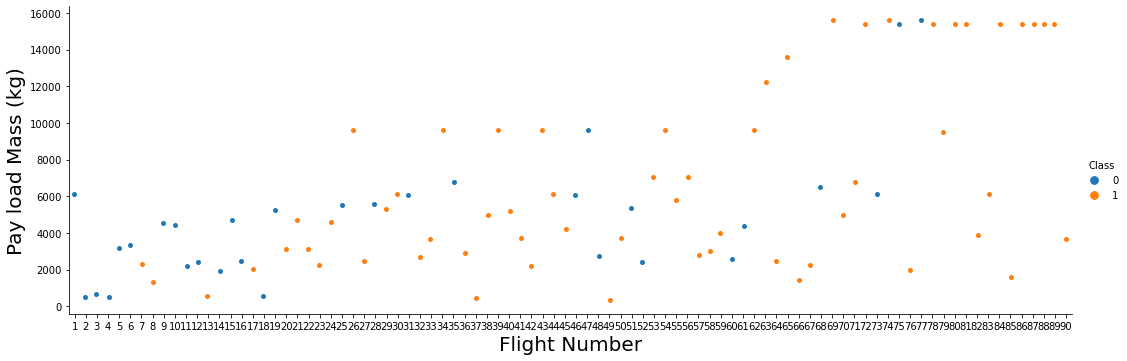

In [78]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


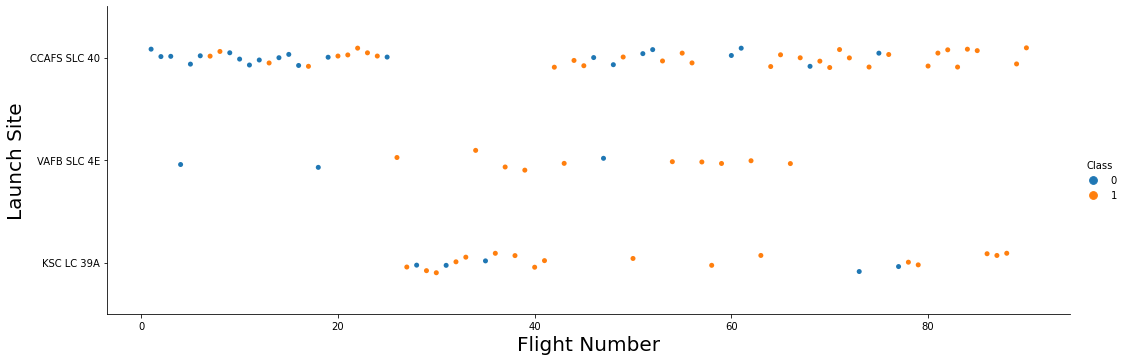

In [76]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### TASK 2: Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.


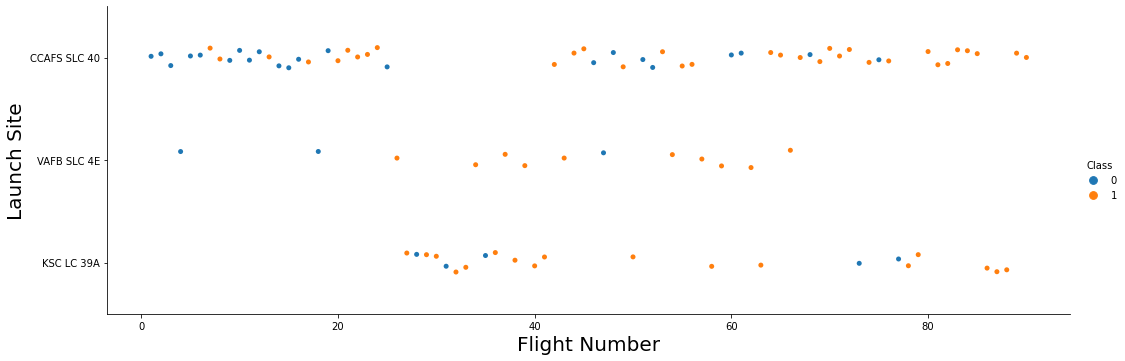

In [77]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()


### TASK  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a `bar chart` for the sucess rate of each orbit


In [63]:
gby = df.groupby(df["Orbit"]).Class.mean()
gby

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

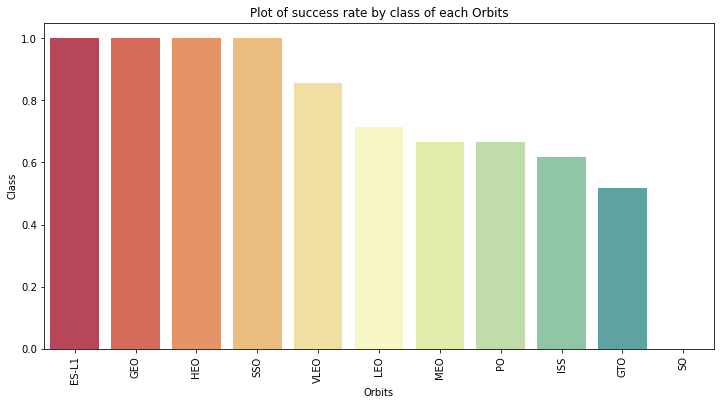

In [66]:
# Use groupby method on Orbit column and get the mean of Class column
grouped_orbits = df.groupby(by=['Orbit'])['Class'].mean().sort_values(ascending=False).reset_index()
fig, ax=plt.subplots(figsize=(12,6))
ax = sns.barplot(x = 'Orbit', y = 'Class', data=grouped_orbits , palette="Spectral")
ax.set_title('Plot of success rate by class of each Orbits', fontdict={'size':12})
ax.set_ylabel('Class', fontsize = 10)
ax.set_xlabel('Orbits', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation=90);

ES-L1, GEO, HEO, SSO are the heighest in the sucess rate.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


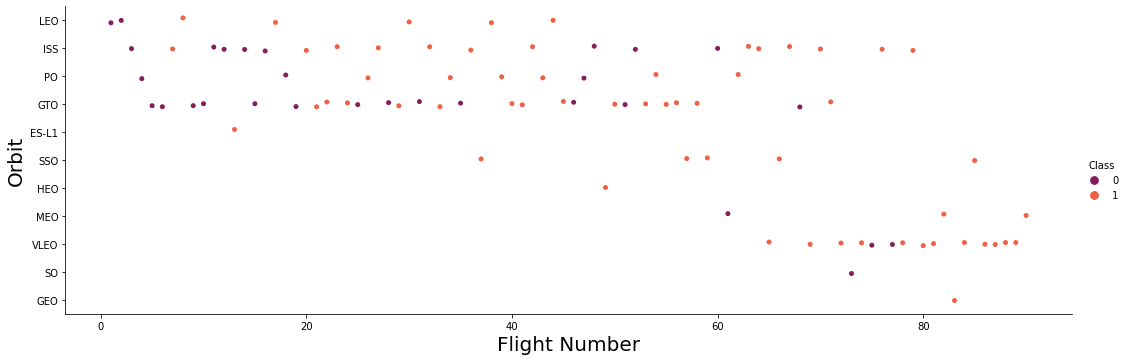

In [75]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 3 , palette="rocket")
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### TASK  5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


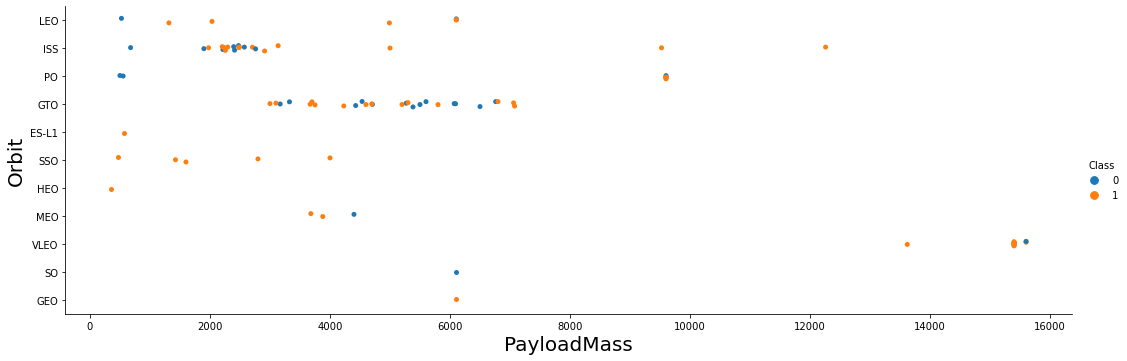

In [74]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.



### TASK  6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [79]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

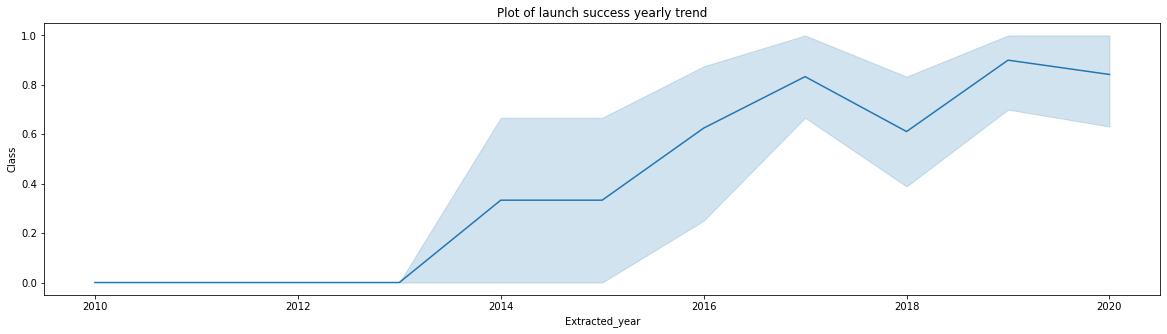

In [82]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df_copy = df.copy()
df_copy['Extracted_year'] = pd.DatetimeIndex(df['Date']).year

# plot line chart
fig, ax=plt.subplots(figsize=(20,5))
sns.lineplot(data=df_copy, x='Extracted_year', y='Class')
plt.title('Plot of launch success yearly trend');
plt.show()

## Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [89]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [86]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [87]:
# HINT: Use get_dummies() function on the categorical columns
features_oh = pd.get_dummies(features, drop_first=True)
features_oh.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TASK  8: Cast all numeric columns to `float64`


In [88]:
# HINT: use astype function
features_oh =  features_oh.astype(float)
features_oh.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object

## Launch Sites Locations Analysis with Folium

In [90]:
!pip3 install folium
!pip3 install wget

     |████████████████████████████████| 95 kB 4.1 MB/s eta 0:00:011
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=b4f78e5cd13daf6b2118b6d0cc7a4cdd8436879cf0f65eda2454c857e4c0c077
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [91]:
import folium
import wget

# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [92]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

## Task 1: Mark all launch sites on a map

In [93]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [94]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [95]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle.

Now, let's add a circle for each launch site in data frame launch_sites

TODO: Create and add folium.Circle and folium.Marker for each launch site on the site map

An example of folium.Circle:

folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))

An example of folium.Marker:

`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [97]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for index, site in launch_sites_df.iterrows():
    circle = folium.Circle([site['Lat'], site['Long']], color='#d35400', radius=50, fill=True).add_child(folium.Popup(site['Launch Site']))
    marker = folium.Marker(
    [site['Lat'], site['Long']],
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % site['Launch Site'],
        )
    )
    site_map.add_child(circle)
    site_map.add_child(marker)

site_map

## Task 2: Mark the success/failed launches for each site on the map


In [98]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [100]:
marker_cluster = MarkerCluster()

*TODO:* Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value

In [101]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


*TODO:* For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`


In [102]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)
    marker_cluster.add_child(marker)

site_map

## TASK 3: Calculate the distances between a launch site to its proximities

Next, we need to explore and analyze the proximities of launch sites.

Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)

In [103]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [104]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

*TODO:* Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.

In [106]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

*TODO:* After obtained its coordinate, create a `folium.Marker` to show the distance

In [107]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )

In [109]:
#Work out distance to coastline
coordinates = [
    [28.56342, -80.57674],
    [28.56342, -80.56756]]

lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)
distance = calculate_distance(coordinates[0][0], coordinates[0][1], coordinates[1][0], coordinates[1][1])
distance_circle = folium.Marker(
    [28.56342, -80.56794],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
        )
    )
site_map.add_child(distance_circle)
site_map

## Machine Learning Prediction

In [111]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [112]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [121]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X.head(100)


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.

### TASK  1

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [122]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### TASK  2
 
Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [123]:
# students get this 
transform = preprocessing.StandardScaler()

In [124]:
X = transform.fit_transform(X)

### TASK  3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [126]:
Y_test.shape

(18,)

### TASK  4

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [130]:
# define hyperparameters to tune 
parameters_lr ={"C":[0.01,0.1,1],
             'penalty':['l2'], 
             'solver':['lbfgs']}# l1 lasso l2 ridge

# define the model
lr = LogisticRegression(random_state = 12345)

# define the grid search object
grid_search_lr = GridSearchCV(
    estimator = lr,
    param_grid = parameters_lr,
    scoring = 'accuracy',
    cv = 10
)
# execute search
logreg_cv = grid_search_lr.fit(X_train,Y_train)

In [131]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


### TASK  5

Calculate the accuracy on the test data using the method <code>score</code>:


In [133]:
print('Accuracy on test data is: {:.3f}'.format(logreg_cv.score(X_test, Y_test)))

Accuracy on test data is: 0.833


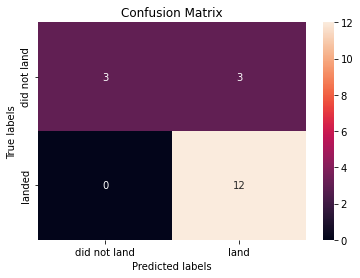

In [134]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.

### TASK  6

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [136]:
# define hyperparameters to tune 
parameters_svm = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# define the model
svm = SVC(random_state = 12345)

# define the grid search object
grid_search_svm = GridSearchCV(
    estimator = svm,
    param_grid = parameters_svm,
    scoring = 'accuracy',
    cv = 10
)
# execute search
svm_cv = grid_search_svm.fit(X_train,Y_train)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [137]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


### TASK  7

Calculate the accuracy on the test data using the method <code>score</code>:


In [138]:
print('Accuracy on test data is: {:.3f}'.format(svm_cv.score(X_test, Y_test)))

Accuracy on test data is: 0.833


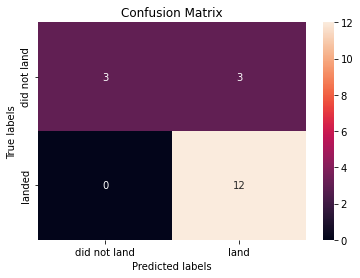

In [139]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### TASK  8

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [140]:
# define hyperparameters to tune 
parameters_tree = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# define the model
tree = DecisionTreeClassifier(random_state = 12345)

# define the grid search object
grid_search_tree = GridSearchCV(
    estimator = tree,
    param_grid = parameters_tree,
    scoring = 'accuracy',
    cv = 10
)
# execute search
tree_cv = grid_search_tree.fit(X_train, Y_train)

In [141]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8732142857142856


### TASK  9

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [142]:
print('Accuracy on test data is: {:.3f}'.format(tree_cv.score(X_test, Y_test)))

Accuracy on test data is: 0.833


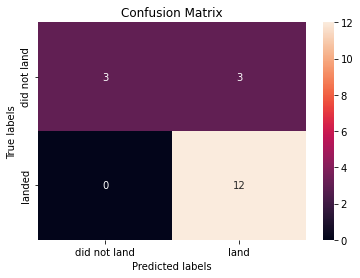

In [143]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### TASK  10

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [144]:
# define hyperparameters to tune
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# define the model
knn = KNeighborsClassifier()

# define the grid search object
grid_search_knn = GridSearchCV(
    estimator = knn,
    param_grid = parameters_knn,
    scoring = 'accuracy',
    cv = 10
)
# execute search
knn_cv = grid_search_knn.fit(X_train, Y_train)

In [145]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


### TASK  11

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [146]:
print('Accuracy on test data is: {:.3f}'.format(knn_cv.score(X_test, Y_test)))

Accuracy on test data is: 0.833


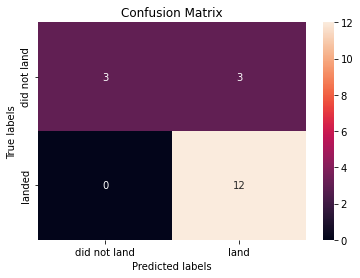

In [147]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### TASK  12

Find the method performs best:


In [148]:
models = {'KNeighbors':knn_cv.best_score_,
              'DecisionTree':tree_cv.best_score_,
              'LogisticRegression':logreg_cv.best_score_,
              'SupportVector': svm_cv.best_score_}

bestalgorithm = max(models, key=models.get)
print('Best model is', bestalgorithm,'with a score of', models[bestalgorithm])


if bestalgorithm == 'DecisionTree':
    print('Best params is :', tree_cv.best_params_)
if bestalgorithm == 'KNeighbors':
    print('Best params is :', knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best params is :', logreg_cv.best_params_)
if bestalgorithm == 'SupportVector':
    print('Best params is :', svm_cv.best_params_)

Best model is DecisionTree with a score of 0.8732142857142856
Best params is : {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
